In [1]:
import findspark
findspark.init()
findspark.find()


'C:\\Program Files\\spark-3.1.2-bin-hadoop3.2\\spark-3.1.2-bin-hadoop3.2'

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import when, count, col, isnull, regexp_replace
from pyspark.sql.types import StructField,IntegerType, StructType,StringType

In [4]:
spark= SparkSession.builder.appName('Loan').getOrCreate()

In [5]:
spark

In [6]:
df=spark.read.option('header','true').csv('SBAnational.csv',inferSchema=True)

In [7]:
df.show(2)

+-------------+--------------------+----------+-----+-----+----------------+---------+------+------------+----------+----+-----+--------+---------+-----------+-------------+----------+---------+------+----------+----------------+-----------------+------------+----------+------------+-----------+-----------+
|LoanNr_ChkDgt|                Name|      City|State|  Zip|            Bank|BankState| NAICS|ApprovalDate|ApprovalFY|Term|NoEmp|NewExist|CreateJob|RetainedJob|FranchiseCode|UrbanRural|RevLineCr|LowDoc|ChgOffDate|DisbursementDate|DisbursementGross|BalanceGross|MIS_Status|ChgOffPrinGr|     GrAppv|   SBA_Appv|
+-------------+--------------------+----------+-----+-----+----------------+---------+------+------------+----------+----+-----+--------+---------+-----------+-------------+----------+---------+------+----------+----------------+-----------------+------------+----------+------------+-----------+-----------+
|   1000014003|      ABC HOBBYCRAFT|EVANSVILLE|   IN|47711|FIFTH THIRD BA

In [8]:
# Creates a Schema of dataFrame
df.printSchema()

root
 |-- LoanNr_ChkDgt: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Bank: string (nullable = true)
 |-- BankState: string (nullable = true)
 |-- NAICS: string (nullable = true)
 |-- ApprovalDate: string (nullable = true)
 |-- ApprovalFY: string (nullable = true)
 |-- Term: integer (nullable = true)
 |-- NoEmp: integer (nullable = true)
 |-- NewExist: integer (nullable = true)
 |-- CreateJob: integer (nullable = true)
 |-- RetainedJob: integer (nullable = true)
 |-- FranchiseCode: integer (nullable = true)
 |-- UrbanRural: integer (nullable = true)
 |-- RevLineCr: string (nullable = true)
 |-- LowDoc: string (nullable = true)
 |-- ChgOffDate: string (nullable = true)
 |-- DisbursementDate: string (nullable = true)
 |-- DisbursementGross: string (nullable = true)
 |-- BalanceGross: string (nullable = true)
 |-- MIS_Status: string (nullable = true)
 |-- ChgOffPr

In [9]:
df.columns

['LoanNr_ChkDgt',
 'Name',
 'City',
 'State',
 'Zip',
 'Bank',
 'BankState',
 'NAICS',
 'ApprovalDate',
 'ApprovalFY',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

In [10]:
#Create summary statistics of df

#df.describe().show()

In [11]:
# Total no. of records
#df.count()

In [12]:
#Remove duplicate records

#df=df.dropDuplicates()

#df.count() #No duplicates found

In [13]:
df.select('Name').distinct().count() #Almost 90% are unique values. So drop 'Name' column.

779587

In [14]:
df.select('Bank').distinct().count()

5869

In [15]:
df.select('NAICS').distinct().count()

1342

In [16]:
df.select('BankState').distinct().count()

102

In [17]:
#Finding columns with missing values.

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()


+-------------+----+----+-----+---+----+---------+-----+------------+----------+----+-----+--------+---------+-----------+-------------+----------+---------+------+----------+----------------+-----------------+------------+----------+------------+------+--------+
|LoanNr_ChkDgt|Name|City|State|Zip|Bank|BankState|NAICS|ApprovalDate|ApprovalFY|Term|NoEmp|NewExist|CreateJob|RetainedJob|FranchiseCode|UrbanRural|RevLineCr|LowDoc|ChgOffDate|DisbursementDate|DisbursementGross|BalanceGross|MIS_Status|ChgOffPrinGr|GrAppv|SBA_Appv|
+-------------+----+----+-----+---+----+---------+-----+------------+----------+----+-----+--------+---------+-----------+-------------+----------+---------+------+----------+----------------+-----------------+------------+----------+------------+------+--------+
|            0|   3|  30|   14|  0|1559|     1566|    0|           0|         0|   0|    0|     136|        0|          0|            0|         0|     4528|  2582|    736402|            2431|                

In [18]:
# Drop columns 
df=df.drop('Name','LoanNr_ChkDgt','City')

In [19]:
df=df.drop('Bank','BankState','Zip','ApprovalDate','ApprovalFY','DisbursementDate','DisbursementGross'
        ,'BalanceGross','ChgoffPrinGR')
df=df.drop('Zip','RevLineCr','SBA_Appv')

In [20]:
df= df.drop('ChgOffDate')

In [21]:
df=df.na.drop(how='any',subset=['MIS_Status'])

In [22]:
df=df.na.drop(how='any',subset=['State'])

In [23]:
df=df.na.drop(how='any',subset=['LowDoc'])

In [24]:
df=df.na.drop(how='any',subset=['CreateJob'])

In [25]:
df=df.na.drop(how='any',subset=['NAICS'])

In [124]:
df.show(5)

+-----+------+----+-----+--------+---------+-----------+-------------+----------+------+----------+------------+
|State| NAICS|Term|NoEmp|NewExist|CreateJob|RetainedJob|FranchiseCode|UrbanRural|LowDoc|MIS_Status|      GrAppv|
+-----+------+----+-----+--------+---------+-----------+-------------+----------+------+----------+------------+
|   IN|451120|  84|    4|       2|        0|          0|            1|         0|     Y|     P I F| $60,000.00 |
|   IN|722410|  60|    2|       2|        0|          0|            1|         0|     Y|     P I F| $40,000.00 |
|   IN|621210| 180|    7|       1|        0|          0|            1|         0|     N|     P I F|$287,000.00 |
|   OK|     0|  60|    2|       1|        0|          0|            1|         0|     Y|     P I F| $35,000.00 |
|   FL|     0| 240|   14|       1|        7|          7|            1|         0|     N|     P I F|$229,000.00 |
+-----+------+----+-----+--------+---------+-----------+-------------+----------+------+--------

In [26]:
# Removing $ symbol from col'GrAppv'
df=df.withColumn('GrAppv', F.regexp_replace(F.col('GrAppv'),'[$]',''))

In [27]:
df=df.withColumn('GrAppv', F.regexp_replace(F.col('GrAppv'),'[,]',''))

In [28]:
#Convert cols 'NAICS' and 'GrAppv' to numbers
df = df.withColumn('GrAppv', df['GrAppv'].cast("float"))
df = df.withColumn('NAICS', df['NAICS'].cast("int"))

In [29]:
#Extracting 1st two-digits from NAICS column

df=df.withColumn('NAICS',df['NAICS'][1:2])
df.show(5)

+-----+-----+----+-----+--------+---------+-----------+-------------+----------+------+----------+--------+
|State|NAICS|Term|NoEmp|NewExist|CreateJob|RetainedJob|FranchiseCode|UrbanRural|LowDoc|MIS_Status|  GrAppv|
+-----+-----+----+-----+--------+---------+-----------+-------------+----------+------+----------+--------+
|   IN|   45|  84|    4|       2|        0|          0|            1|         0|     Y|     P I F| 60000.0|
|   IN|   72|  60|    2|       2|        0|          0|            1|         0|     Y|     P I F| 40000.0|
|   IN|   62| 180|    7|       1|        0|          0|            1|         0|     N|     P I F|287000.0|
|   OK|    0|  60|    2|       1|        0|          0|            1|         0|     Y|     P I F| 35000.0|
|   FL|    0| 240|   14|       1|        7|          7|            1|         0|     N|     P I F|229000.0|
+-----+-----+----+-----+--------+---------+-----------+-------------+----------+------+----------+--------+
only showing top 5 rows



In [143]:
df.printSchema()

root
 |-- State: string (nullable = true)
 |-- NAICS: string (nullable = true)
 |-- Term: integer (nullable = true)
 |-- NoEmp: integer (nullable = true)
 |-- NewExist: integer (nullable = true)
 |-- CreateJob: integer (nullable = true)
 |-- RetainedJob: integer (nullable = true)
 |-- FranchiseCode: integer (nullable = true)
 |-- UrbanRural: integer (nullable = true)
 |-- LowDoc: string (nullable = true)
 |-- MIS_Status: string (nullable = true)
 |-- GrAppv: float (nullable = true)



In [102]:
df1=df.toPandas()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894576 entries, 0 to 894575
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State          894576 non-null  object 
 1   NAICS          894508 non-null  object 
 2   Term           894576 non-null  int32  
 3   NoEmp          894576 non-null  int32  
 4   NewExist       894445 non-null  float64
 5   CreateJob      894576 non-null  int32  
 6   RetainedJob    894576 non-null  int32  
 7   FranchiseCode  894576 non-null  int32  
 8   UrbanRural     894576 non-null  int32  
 9   LowDoc         894576 non-null  object 
 10  MIS_Status     894576 non-null  object 
 11  GrAppv         894576 non-null  float32
dtypes: float32(1), float64(1), int32(6), object(4)
memory usage: 58.0+ MB


In [63]:
df1.describe()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,GrAppv
count,894576.000000,894576.000000,894445.000000,894576.000000,894576.000000,894576.000000,894576.000000,8.945760e+05
mean,111.094364,11.437133,1.280801,8.459165,10.821937,2759.693461,1.246191,1.932718e+05
std,80.656820,73.906391,0.498614,237.291653,237.724820,12771.457464,181.843629,2.837098e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.500000e+04
50%,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000e+04
75%,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.260000e+05
max,2004.000000,9999.000000,127.000000,8800.000000,9500.000000,99999.000000,79950.000000,5.472000e+06


In [103]:
#To remove outliers
max_term=df1['Term'].quantile(0.90)


In [104]:
df1= df1[df1['Term']<max_term]

In [74]:
df1.sample(10)

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv
673692,TX,42,84,1,1.0,1,1,1,0,N,P I F,5000.0
384852,CA,42,84,2,1.0,0,2,0,1,N,P I F,15000.0
172941,AZ,54,55,1,1.0,1,1,1,1,N,CHGOFF,15000.0
265146,TX,23,84,6,1.0,3,6,1,1,N,P I F,50000.0
657882,WA,44,84,2,1.0,0,2,1,1,N,P I F,100000.0
84240,MD,23,84,3,1.0,2,3,0,1,N,P I F,75000.0
615531,MT,0,204,15,1.0,0,0,1,0,N,P I F,222600.0
506890,OH,23,14,15,1.0,0,0,1,0,N,P I F,40000.0
223067,MN,62,84,1,2.0,0,1,1,1,N,P I F,85000.0
252093,CO,0,222,2,2.0,0,0,1,0,Y,P I F,96500.0


In [111]:
df1['NAICS']=df1['NAICS'].astype(str).astype(int)

In [176]:
#Giving categories based on the naics code:
#dict_naics={'11':'Agriculture forestry, fishing and hunting',
           # '21':'Mining, quarrying, and oil and gas extraction'
           #}


In [180]:
#df1=df.toPandas()
#df.select('NAICS').toPandas()
#df1['NAICS_Sector'] = df1['NAICS'].map(dict_naics)                    
#df1['NAICS_Sector'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: NAICS_Sector, dtype: object

In [69]:
df.groupBy(df.State).count().orderBy('count',ascending=False).show(8)

+-----+------+
|State| count|
+-----+------+
|   CA|130307|
|   TX| 70169|
|   NY| 57319|
|   FL| 41054|
|   PA| 34746|
|   OH| 32429|
|   IL| 29547|
|   MA| 25023|
+-----+------+
only showing top 8 rows



In [33]:
df.groupBy('NAICS').count().orderBy('count',ascending=False).show(10)

+-----+------+
|NAICS| count|
+-----+------+
|    0|201630|
|   44| 84389|
|   81| 72201|
|   54| 67539|
|   72| 67327|
|   23| 66167|
|   62| 55124|
|   42| 48569|
|   45| 42215|
|   33| 38081|
+-----+------+
only showing top 10 rows



In [203]:
df.groupBy('FranchiseCode').count().orderBy('count',ascending=False).show(10) #Since 1 and 0 indicates no franchise 
            #and other values does not indicate anything as per dataset. This column is not useful to us

+-------------+------+
|FranchiseCode| count|
+-------------+------+
|            1|637327|
|            0|205549|
|        78760|  3372|
|        68020|  1917|
|        50564|  1034|
|        21780|  1001|
|        25650|   715|
|        79140|   658|
|        22470|   615|
|        17998|   606|
+-------------+------+
only showing top 10 rows



In [204]:
df.groupBy('UrbanRural').count().orderBy('count',ascending=False).show(10)

+----------+------+
|UrbanRural| count|
+----------+------+
|         1|467271|
|         0|322760|
|         2|104477|
+----------+------+



In [202]:
df.groupBy('RetainedJob').count().orderBy('count',ascending=False).show(10)

+-----------+------+
|RetainedJob| count|
+-----------+------+
|          0|439630|
|          1| 87641|
|          2| 76150|
|          3| 49516|
|          4| 39339|
|          5| 32360|
|          6| 23628|
|          7| 16409|
|          8| 15609|
|         10| 15358|
+-----------+------+
only showing top 10 rows



In [205]:
df.groupBy('LowDoc').count().orderBy('count',ascending=False).show(10)

+------+------+
|LowDoc| count|
+------+------+
|     N|780935|
|     Y|110152|
|     0|  1490|
|     C|   758|
|     S|   603|
|     A|   495|
|     R|    74|
|     1|     1|
+------+------+



In [83]:
df.groupBy('NewExist').count().orderBy('count',ascending=False).show(10)

+--------+------+
|NewExist| count|
+--------+------+
|       1|642058|
|       2|251308|
|       0|  1027|
|    null|   131|
|      20|     6|
|       5|     6|
|       6|     5|
|       4|     4|
|       8|     4|
|       3|     4|
+--------+------+
only showing top 10 rows



### Data Visualization

In [35]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

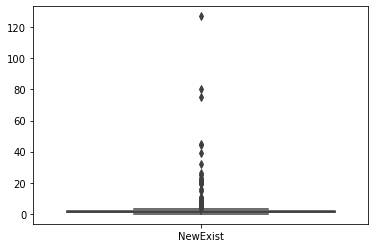

In [36]:
# Box-plot
x= df.select('NewExist').toPandas()
sns.boxplot(data=x)

In [101]:
#Drop the rows with other values in 'Low Doc' and 'NewExist' col
#df1= df1[(df1['LowDoc']== 'Y')] or df1[(df1['LowDoc']=='N')]
#df1= df1[((df1['NewExist']== '1')|(df1['NewExist']=='2'))]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

(array([ 21957.,  35023.,  28562.,  45937.,  43565., 121106.,  29835.,
        250086.,  15808.,  10443.,  84816.,   2667.,   5044.,   2445.,
          3000.,  31304.,   2215.,   2608.,   3374.,   2641.]),
 array([  0.  ,  11.95,  23.9 ,  35.85,  47.8 ,  59.75,  71.7 ,  83.65,
         95.6 , 107.55, 119.5 , 131.45, 143.4 , 155.35, 167.3 , 179.25,
        191.2 , 203.15, 215.1 , 227.05, 239.  ]),
 <BarContainer object of 20 artists>)

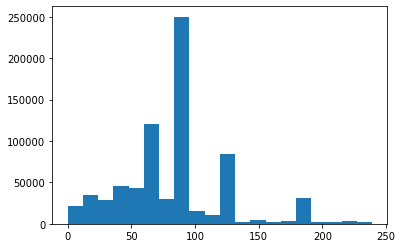

In [75]:
#Histogram for 'Term' column

plt.hist(df1['Term'],bins=20)

<AxesSubplot:xlabel='UrbanRural', ylabel='GrAppv'>

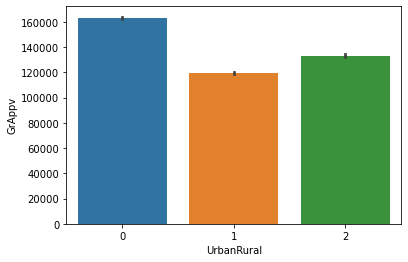

In [76]:
#Bar plot

sns.barplot(x=df1['UrbanRural'],y=df1['GrAppv'],data= df1)

<AxesSubplot:xlabel='Term', ylabel='GrAppv'>

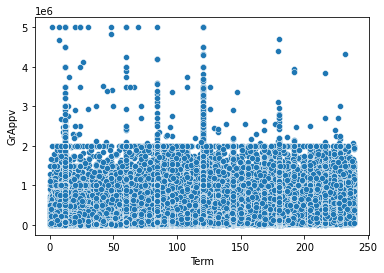

In [77]:
sns.scatterplot(x=df1['Term'],y=df1['GrAppv'],data=df1)

#Data points are completely scattered over the plot. No correlation can be determined

In [82]:
# Creates a Schema of dataFrame
df.printSchema()

root
 |-- State: string (nullable = true)
 |-- NAICS: string (nullable = true)
 |-- Term: integer (nullable = true)
 |-- NoEmp: integer (nullable = true)
 |-- NewExist: integer (nullable = true)
 |-- CreateJob: integer (nullable = true)
 |-- RetainedJob: integer (nullable = true)
 |-- FranchiseCode: integer (nullable = true)
 |-- UrbanRural: integer (nullable = true)
 |-- LowDoc: string (nullable = true)
 |-- MIS_Status: string (nullable = true)
 |-- GrAppv: float (nullable = true)



In [112]:
df1

,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv
0,IN,45,84,4,2.0,0,0,1,0,Y,P I F,60000.0
1,IN,72,60,2,2.0,0,0,1,0,Y,P I F,40000.0
2,IN,62,180,7,1.0,0,0,1,0,N,P I F,287000.0
3,OK,0,60,2,1.0,0,0,1,0,Y,P I F,35000.0
5,CT,33,120,19,1.0,0,0,1,0,N,P I F,517000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
894571,OH,45,60,6,1.0,0,0,1,0,N,P I F,70000.0
894572,OH,45,60,6,1.0,0,0,1,0,N,P I F,85000.0
894573,CA,33,108,26,1.0,0,0,1,0,N,P I F,300000.0
894574,HI,0,60,6,1.0,0,0,1,0,Y,CHGOFF,75000.0


In [132]:
df=spark.createDataFrame(df1)

### Logistic regression model

In [115]:
# import mlib
from pyspark.ml.feature import StringIndexer,VectorAssembler 

In [133]:
indexer=StringIndexer(inputCols=['State','NewExist','UrbanRural','LowDoc','MIS_Status'],
                      outputCols=['State_index','NewExist_index','UrbanRural_index','LowDoc_index','MIS_Status_index'])
df2= indexer.fit(df).transform(df)

In [134]:
df2.columns

['State',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'LowDoc',
 'MIS_Status',
 'GrAppv',
 'NewExist_index',
 'UrbanRural_index',
 'State_index',
 'LowDoc_index',
 'MIS_Status_index']

In [136]:
featureassembler=VectorAssembler(inputCols=['State_index','NAICS','Term','NoEmp','NewExist_index','CreateJob',
                                            'RetainedJob','FranchiseCode','UrbanRural_index','LowDoc_index','GrAppv'], 
                                 outputCol='Independent Features')
output= featureassembler.transform(df2)

In [129]:
#output.show()

In [137]:
finalized_data=output.select('Independent Features','MIS_Status_index')

In [138]:
train_data,test_data=finalized_data.randomSplit([0.80,0.20])

In [139]:
from pyspark.ml.classification import LogisticRegression

In [141]:
lr= LogisticRegression(featuresCol='Independent Features',labelCol='MIS_Status_index')

In [143]:
lr_model= lr.fit(train_data)

In [ ]:
lr_model_summary= lr_model.summary

In [ ]:
lr_model_summary.predictions()

In [96]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [144]:
pred_labels= lr_model.evaluate(test_data)

In [145]:
pred_labels.prediction.show()